# PRCP-1012-GameWinnerPred

# Data Descritption



- <b>DBNOs -</b> Number of enemy players knocked.
- **assists -** Number of enemy players this player damaged that were killed by teammates.
- **boosts -** Number of boost items used.
- **damageDealt -** Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills -** Number of enemy players killed with headshots.
- **heals -** Number of healing items used.
- **Id -** Player’s Id
- **killPlace -** Ranking in match of number of enemy players killed.
- **killPoints -** Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks -** Max number of enemy players killed in a short amount of time.
- **kills -** Number of enemy players killed.
- **longestKill -** Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration -** Duration of match in seconds.
- **matchId -** ID to identify match. There are no matches that are in both the training and testing set.
- **matchType -** String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints -** Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives -** Number of times this player revived teammates.
- **rideDistance -** Total distance traveled in vehicles measured in meters.
- **roadKills -** Number of kills while in a vehicle.
- **swimDistance -** Total distance traveled by swimming measured in meters.
- **teamKills -** Number of times this player killed a teammate.
- **vehicleDestroys -** Number of vehicles destroyed.
- **walkDistance -** Total distance traveled on foot measured in meters.- 
- **weaponsAcquired -** Number of weapons picked up.
- **winPoints -** Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId -** ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups -** Number of groups we have data for in the match.
- **maxPlace -** Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc -** The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

# handling warning 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#!pip install catboost
#import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


## Reading the Data

In [2]:
df= pd.read_csv('pubg.csv')

# Basic Checks

In [3]:
df.shape

(4446966, 29)

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.0,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0,0,0.000,0,0,81.7,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.7,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0,0,0.000,0,0,2748.0,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,1369.0,0,0.000,0,0,1244.0,5,0,0.5464


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [8]:
df.describe(include='all')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446966,4446966,4446966,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
unique,4446966,2026745,47965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,74,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,NaN,NaN,NaN,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,NaN,NaN,NaN,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01


# EDA

## Task 1:- Complete data analysis report on the given data.

## Univariate Analysis

In [9]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |                                                     | [  0%]   …

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



## Insights on Univariate Analysis:

Univariate analysis focuses on analyzing one variable at a time to understand its distribution, central tendency, variability, and shape. Here are some insights that can be gained through univariate analysis:

* Central Tendency:

Mean, median, and mode: Univariate analysis helps in calculating these measures to understand the central value around which the data is distributed.
Understanding the central tendency provides insights into the typical or average value of the variable.
Variability:

Range: Univariate analysis helps in calculating the range of the variable, which indicates the spread of values from the minimum to the maximum.
Standard deviation and variance: These measures quantify the dispersion or variability of the data points around the central tendency.
Understanding variability is crucial for assessing the consistency or volatility of the variable.

* Distribution:

Histogram: Univariate analysis often involves creating histograms to visualize the distribution of the variable.
Skewness and kurtosis: These measures provide insights into the symmetry and shape of the distribution.
Understanding the distribution helps in identifying patterns, outliers, and potential data issues.
Frequency Analysis:

Count or frequency: Univariate analysis helps in counting the occurrences of different values or categories within the variable.
Mode: Identifying the mode helps in understanding the most frequent value or category within the variable.
Frequency analysis provides insights into the prevalence or occurrence of different values or categories.
Summary Statistics:

Quartiles and percentiles: Univariate analysis helps in calculating these statistics to understand the spread of data across different percentiles.
Summary statistics provide a concise summary of the variable's characteristics, facilitating easy comparison and interpretation.
Outliers Detection:

Box plots: Univariate analysis involves creating box plots to visualize the distribution of the variable and identify potential outliers.
Understanding outliers is important as they may indicate errors in data collection or interesting phenomena worthy of further investigation.
Distributions of Categorical Variables:

Bar charts: Univariate analysis of categorical variables often involves creating bar charts to visualize the frequency distribution of different categories.
Understanding the distribution of categorical variables helps in identifying dominant categories and assessing their impact on the analysis.
By conducting univariate analysis, analysts can gain valuable insights into individual variables, which serve as the foundation for more advanced multivariate analysis and modeling techniques.

## Bivariate Analysis

In [ ]:
#because of the big dataset, it was difficult to plot the the heatmap, system was not supporting the code.

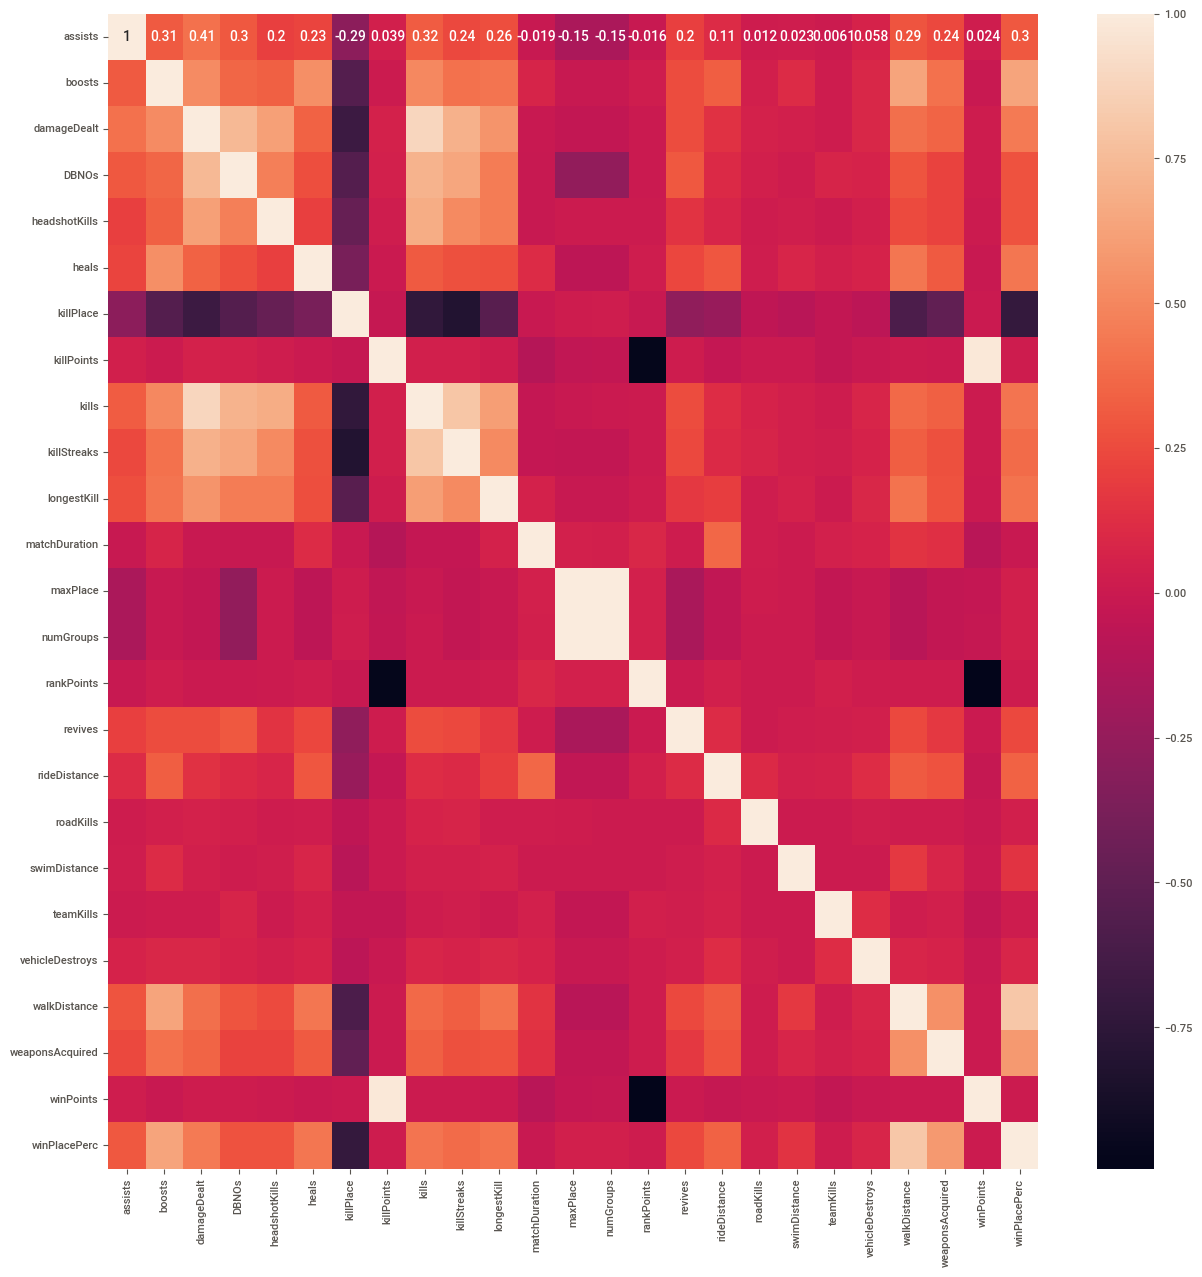

In [10]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=[15,15])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## Insights on Bivariate Analysis:

Bivariate analysis involves analyzing the relationship between two variables to understand how they are related to each other. Here are some insights gained through bivariate analysis:

Correlation Analysis:

Pearson correlation coefficient: Bivariate analysis helps in calculating the strength and direction of the linear relationship between two continuous variables.
Understanding correlation helps in identifying variables that are positively or negatively associated with each other.


Heatmaps: Bivariate analysis includes creating heatmaps to visualize the correlation matrix between multiple variables.
Heatmaps provide a comprehensive view of the relationships between variables and help in identifying clusters or groups of highly correlated variables.
By conducting bivariate analysis, analysts can gain deeper insights into the relationships between variables, which is crucial for understanding patterns, making predictions, and informing decision-making processes.








# Preprocessing

### 1) Check duplicate data

In [19]:
df.duplicated().sum()

0

### 2)Check null values in data

In [20]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [22]:
# check row with null value win place perc
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [25]:
# remove that row 
df.drop(2744604, inplace = True)

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       4446956, 4446957, 4446958, 4446959, 4446960, 4446961, 4446962, 4446963,
       4446964, 4446965],
      dtype='int64', length=4446965)
False


In [26]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Understanding the Player distribution


In [27]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


### Kill Without Moving 

In [28]:
df['totaldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killwithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

### players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!¶

In [29]:
df[df['killwithoutmoving']==True].head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [30]:
df[df['killwithoutmoving']==True].shape

(1535, 32)

In [32]:
# drop the table 
df.drop(df[df['killwithoutmoving'] == True].index , inplace = True)

In [33]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving'],
      dtype='object')

### Extra Ordinary Road Kills

In [35]:
df[df['roadKills']>=5].shape

(82, 32)

In [36]:
df.drop(df[df['roadKills']>=5].index , inplace= True)

### So many kills -How?
**In a match a player cannot not kill more that 20 kill**

In [37]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [38]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

### Head Shot

In [39]:
df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

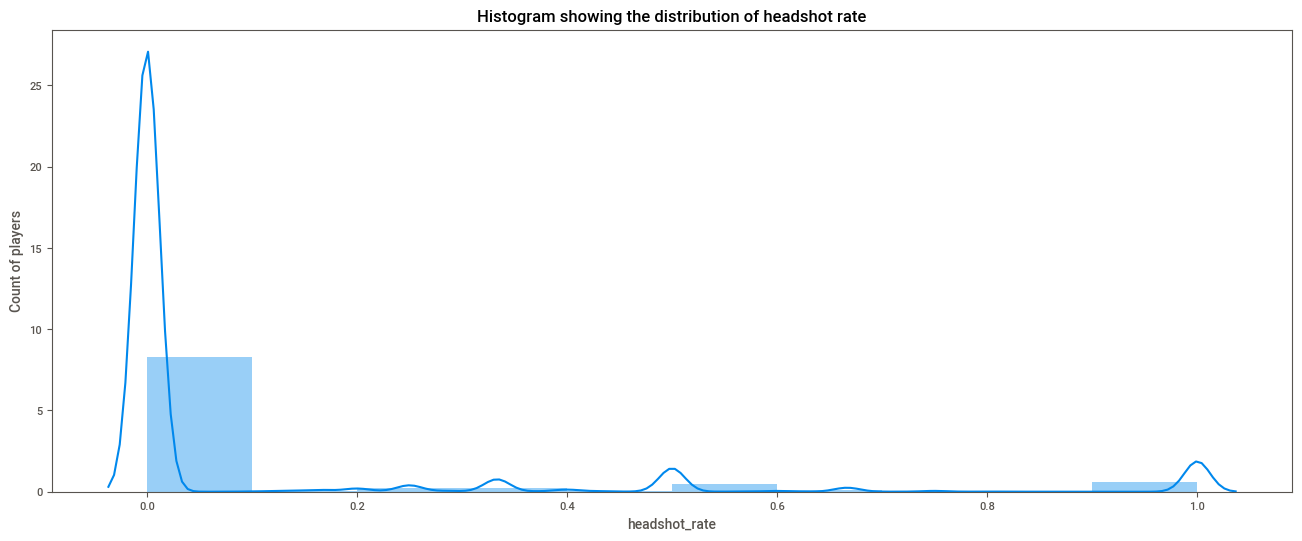

In [40]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [41]:
df[(df['headshot_rate'] ==1) & (df['kills']>5)].shape

(187, 33)

In [43]:
df.drop(df[(df['headshot_rate'] == 1)& (df['kills'] > 6)].index, inplace = True)

### Longest Shot

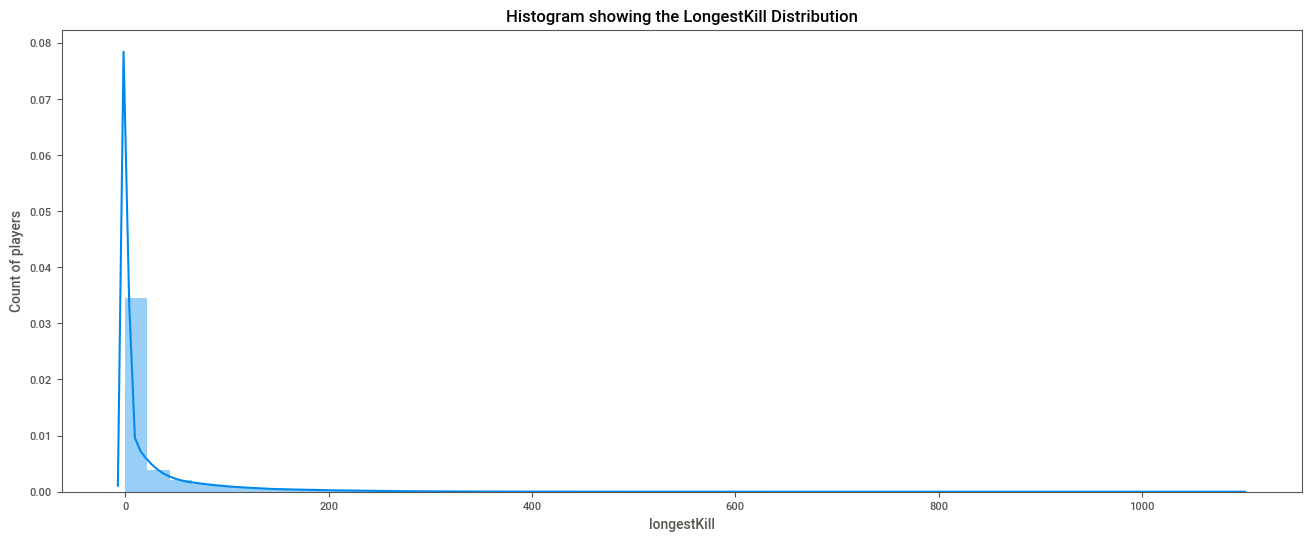

In [44]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

#### If a player can kill more than 500m distance it seem suspisious player so we remove those player

In [45]:
df[df['longestKill']>=500].shape

(1747, 33)

In [46]:
df.drop(df[df['longestKill']>=500].index, inplace = True)

### Weapon Change

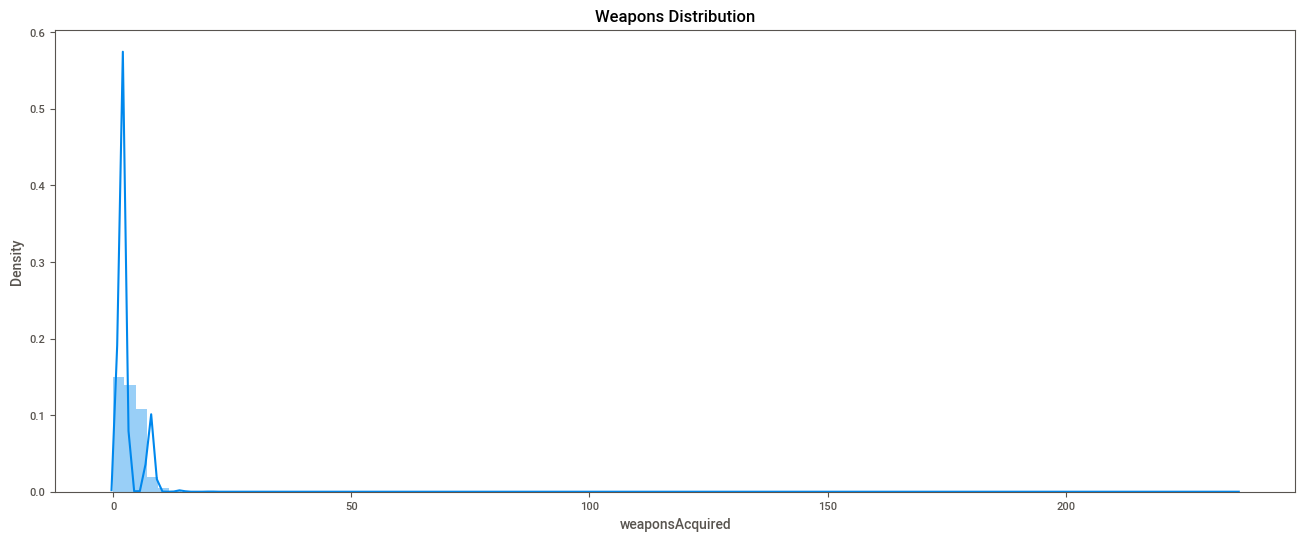

In [47]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [48]:
df[df['weaponsAcquired']>=15].shape

(6809, 33)

In [ ]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

# Feature Engineering 

In [49]:
normalising_factor = (100 - df['playerjoined']/100)+1

In [50]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [51]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [52]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration','killwithoutmoving'])

In [53]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


### Handeling Catogorical Data

In [54]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [55]:
data.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

# Data Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.matchType=lc.fit_transform(data.matchType)

In [57]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,15,26,-1,0,...,96,244.8000,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,15,25,1484,0,...,91,1445.0445,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,2,47,1491,0,...,98,161.8000,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,15,30,1408,0,...,91,202.7000,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,13,95,1560,0,...,97,49.7500,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# Outliers Handling

Skipping column 'matchType' as it is non-numeric.


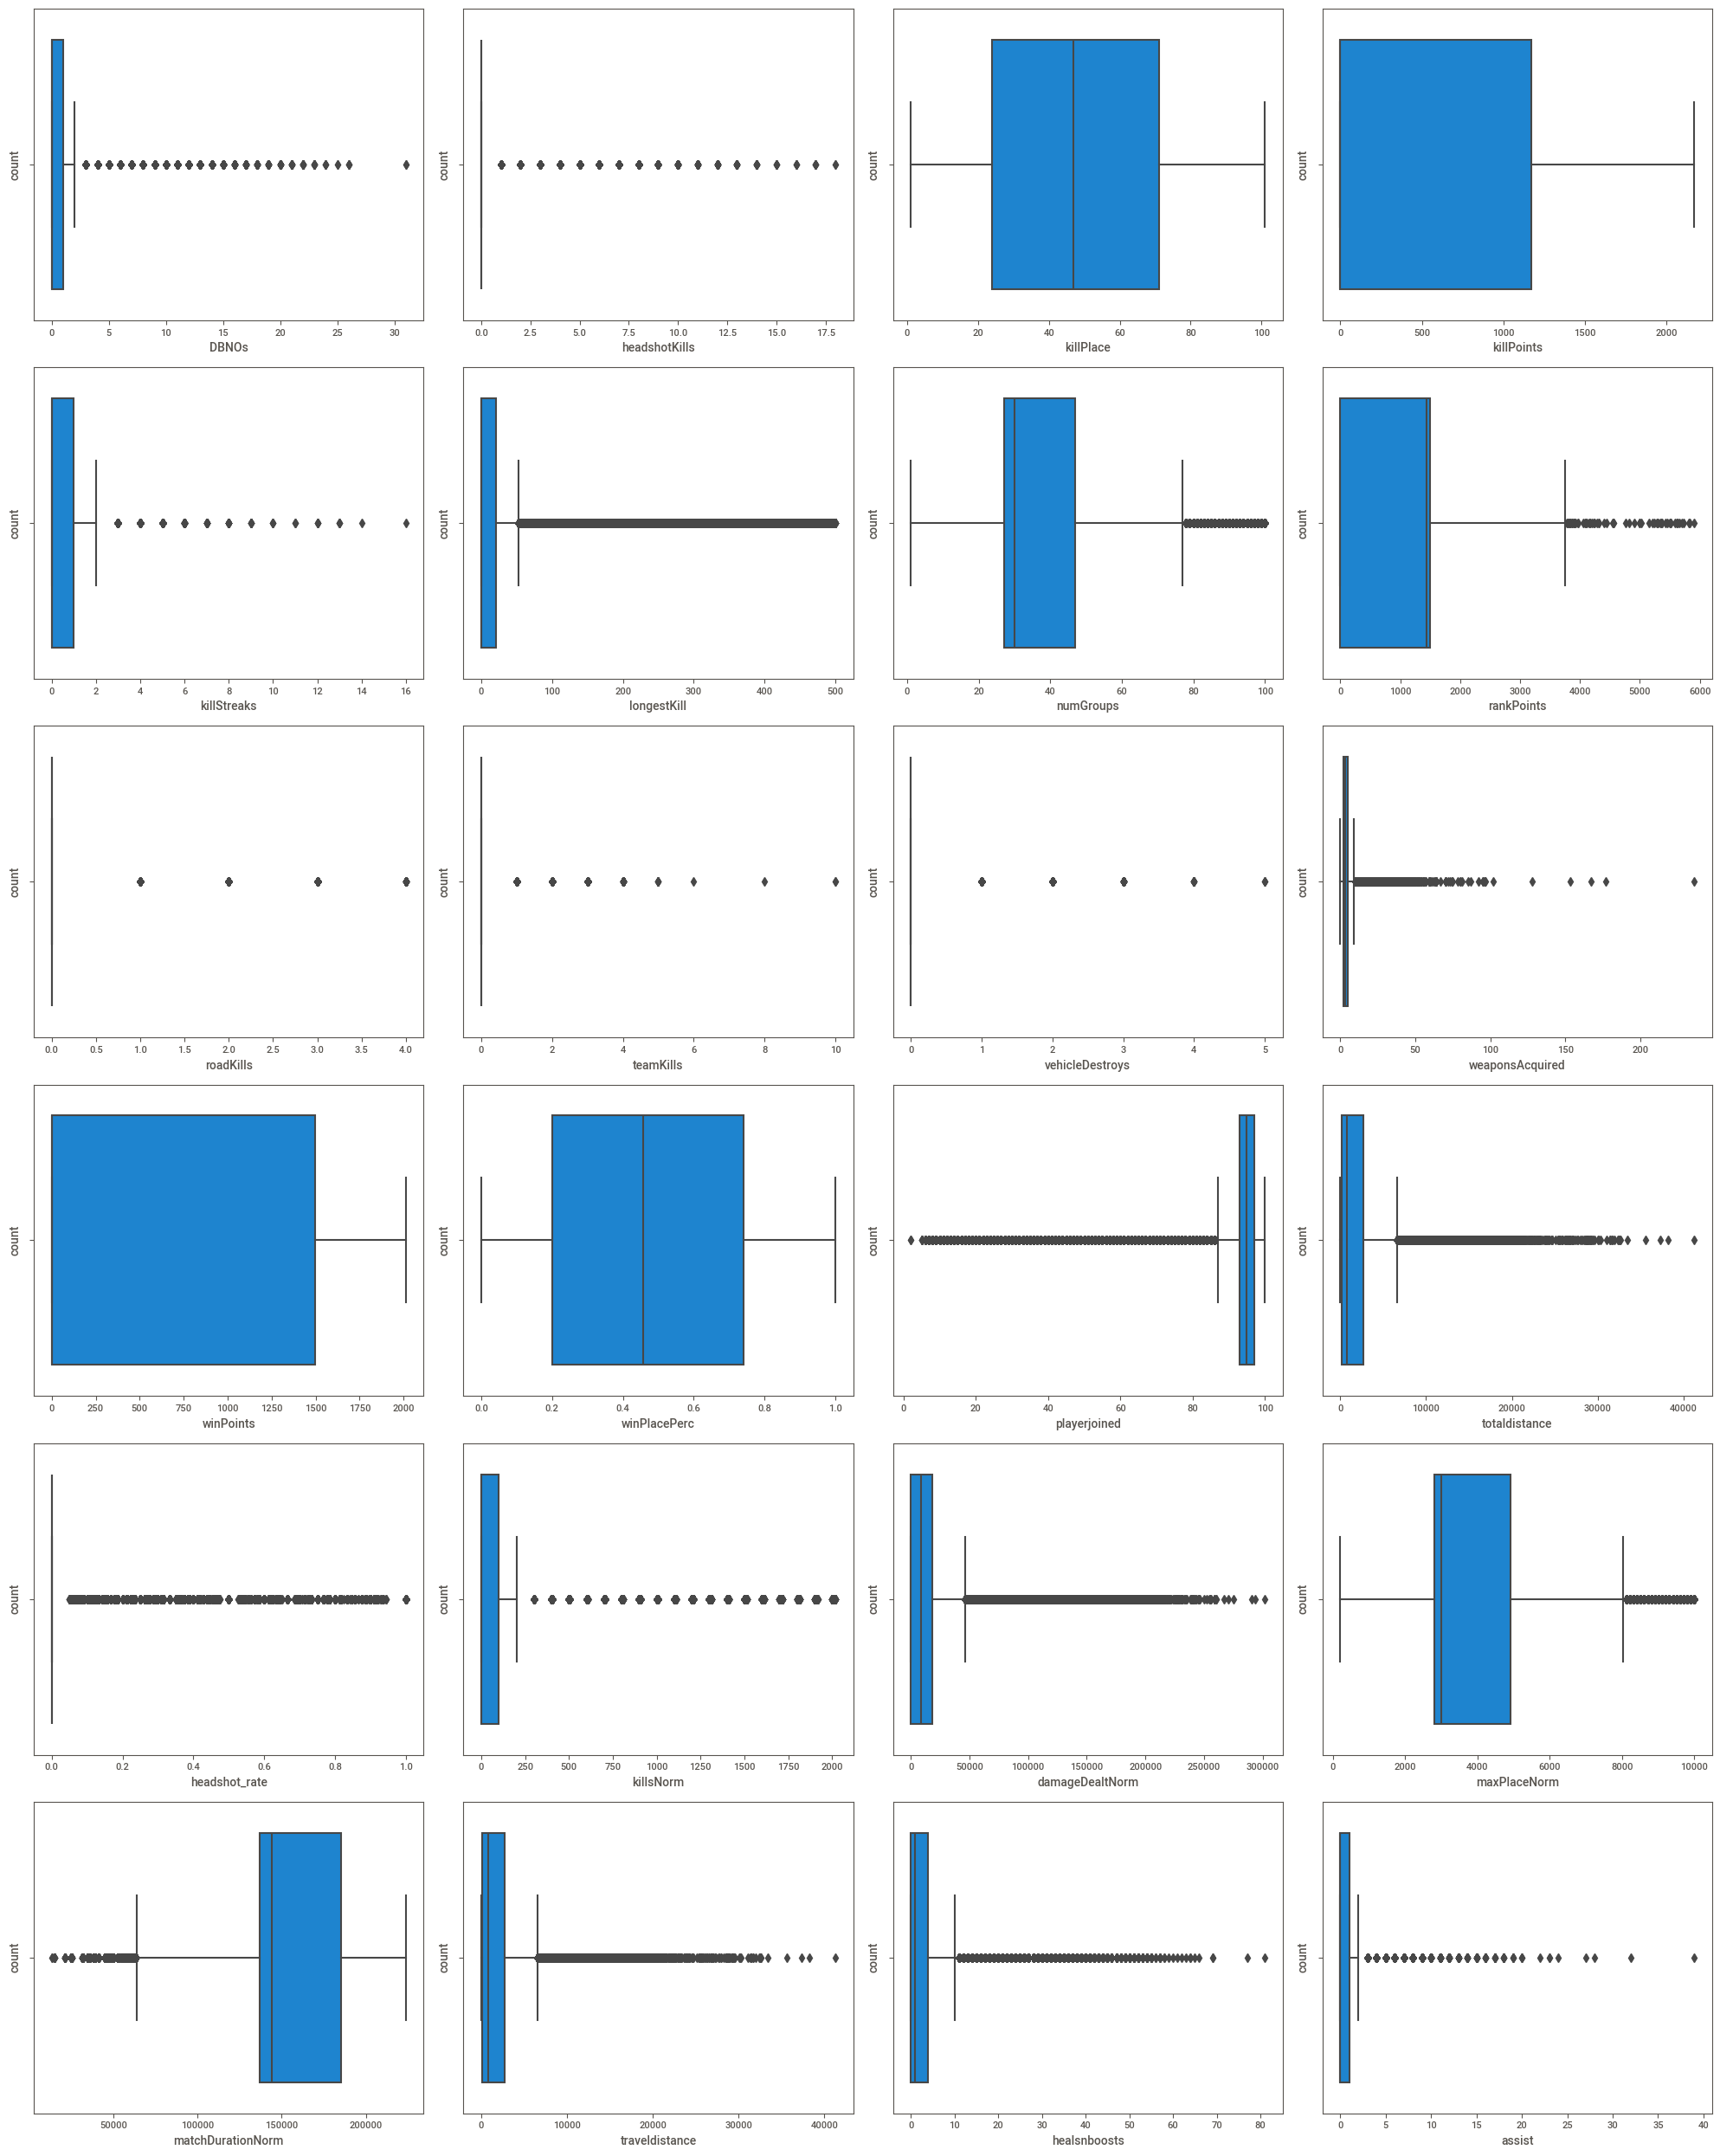

In [58]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [59]:
import numpy as np
from scipy import stats

col = 1
for c in data:  # Assuming data is your DataFrame
    if col <= 25:
        IQR = stats.iqr(data[c], interpolation='midpoint')
        print(c, 'IQR:', IQR)
        Q1 = data[c].quantile(0.25)
        Q3 = data[c].quantile(0.75)
        min_limit = Q1 - 1.5 * IQR
        print(c, 'min_limit:', min_limit)
        max_limit = Q3 + 1.5 * IQR
        print(c, 'max_limit:', max_limit, '\n')

        # Replace outliers with the median
        data.loc[(data[c] < min_limit) | (data[c] > max_limit), c] = np.median(data[c])

        # Double-check if outliers are replaced
        replaced_outliers = data.loc[(data[c] < min_limit) | (data[c] > max_limit), c]
        print(f"Replaced outliers in {c}:", replaced_outliers, '\n')
    
    col += 1


DBNOs IQR: 1.0
DBNOs min_limit: -1.5
DBNOs max_limit: 2.5 

Replaced outliers in DBNOs: Series([], Name: DBNOs, dtype: int64) 

headshotKills IQR: 0.0
headshotKills min_limit: 0.0
headshotKills max_limit: 0.0 

Replaced outliers in headshotKills: Series([], Name: headshotKills, dtype: int64) 

killPlace IQR: 47.0
killPlace min_limit: -46.5
killPlace max_limit: 141.5 

Replaced outliers in killPlace: Series([], Name: killPlace, dtype: int64) 

killPoints IQR: 1172.0
killPoints min_limit: -1758.0
killPoints max_limit: 2930.0 

Replaced outliers in killPoints: Series([], Name: killPoints, dtype: int64) 

killStreaks IQR: 1.0
killStreaks min_limit: -1.5
killStreaks max_limit: 2.5 

Replaced outliers in killStreaks: Series([], Name: killStreaks, dtype: int64) 

longestKill IQR: 21.23
longestKill min_limit: -31.845
longestKill max_limit: 53.075 

Replaced outliers in longestKill: Series([], Name: longestKill, dtype: float64) 

matchType IQR: 12.0
matchType min_limit: -15.0
matchType max_limi

Skipping column 'matchType' as it is non-numeric.


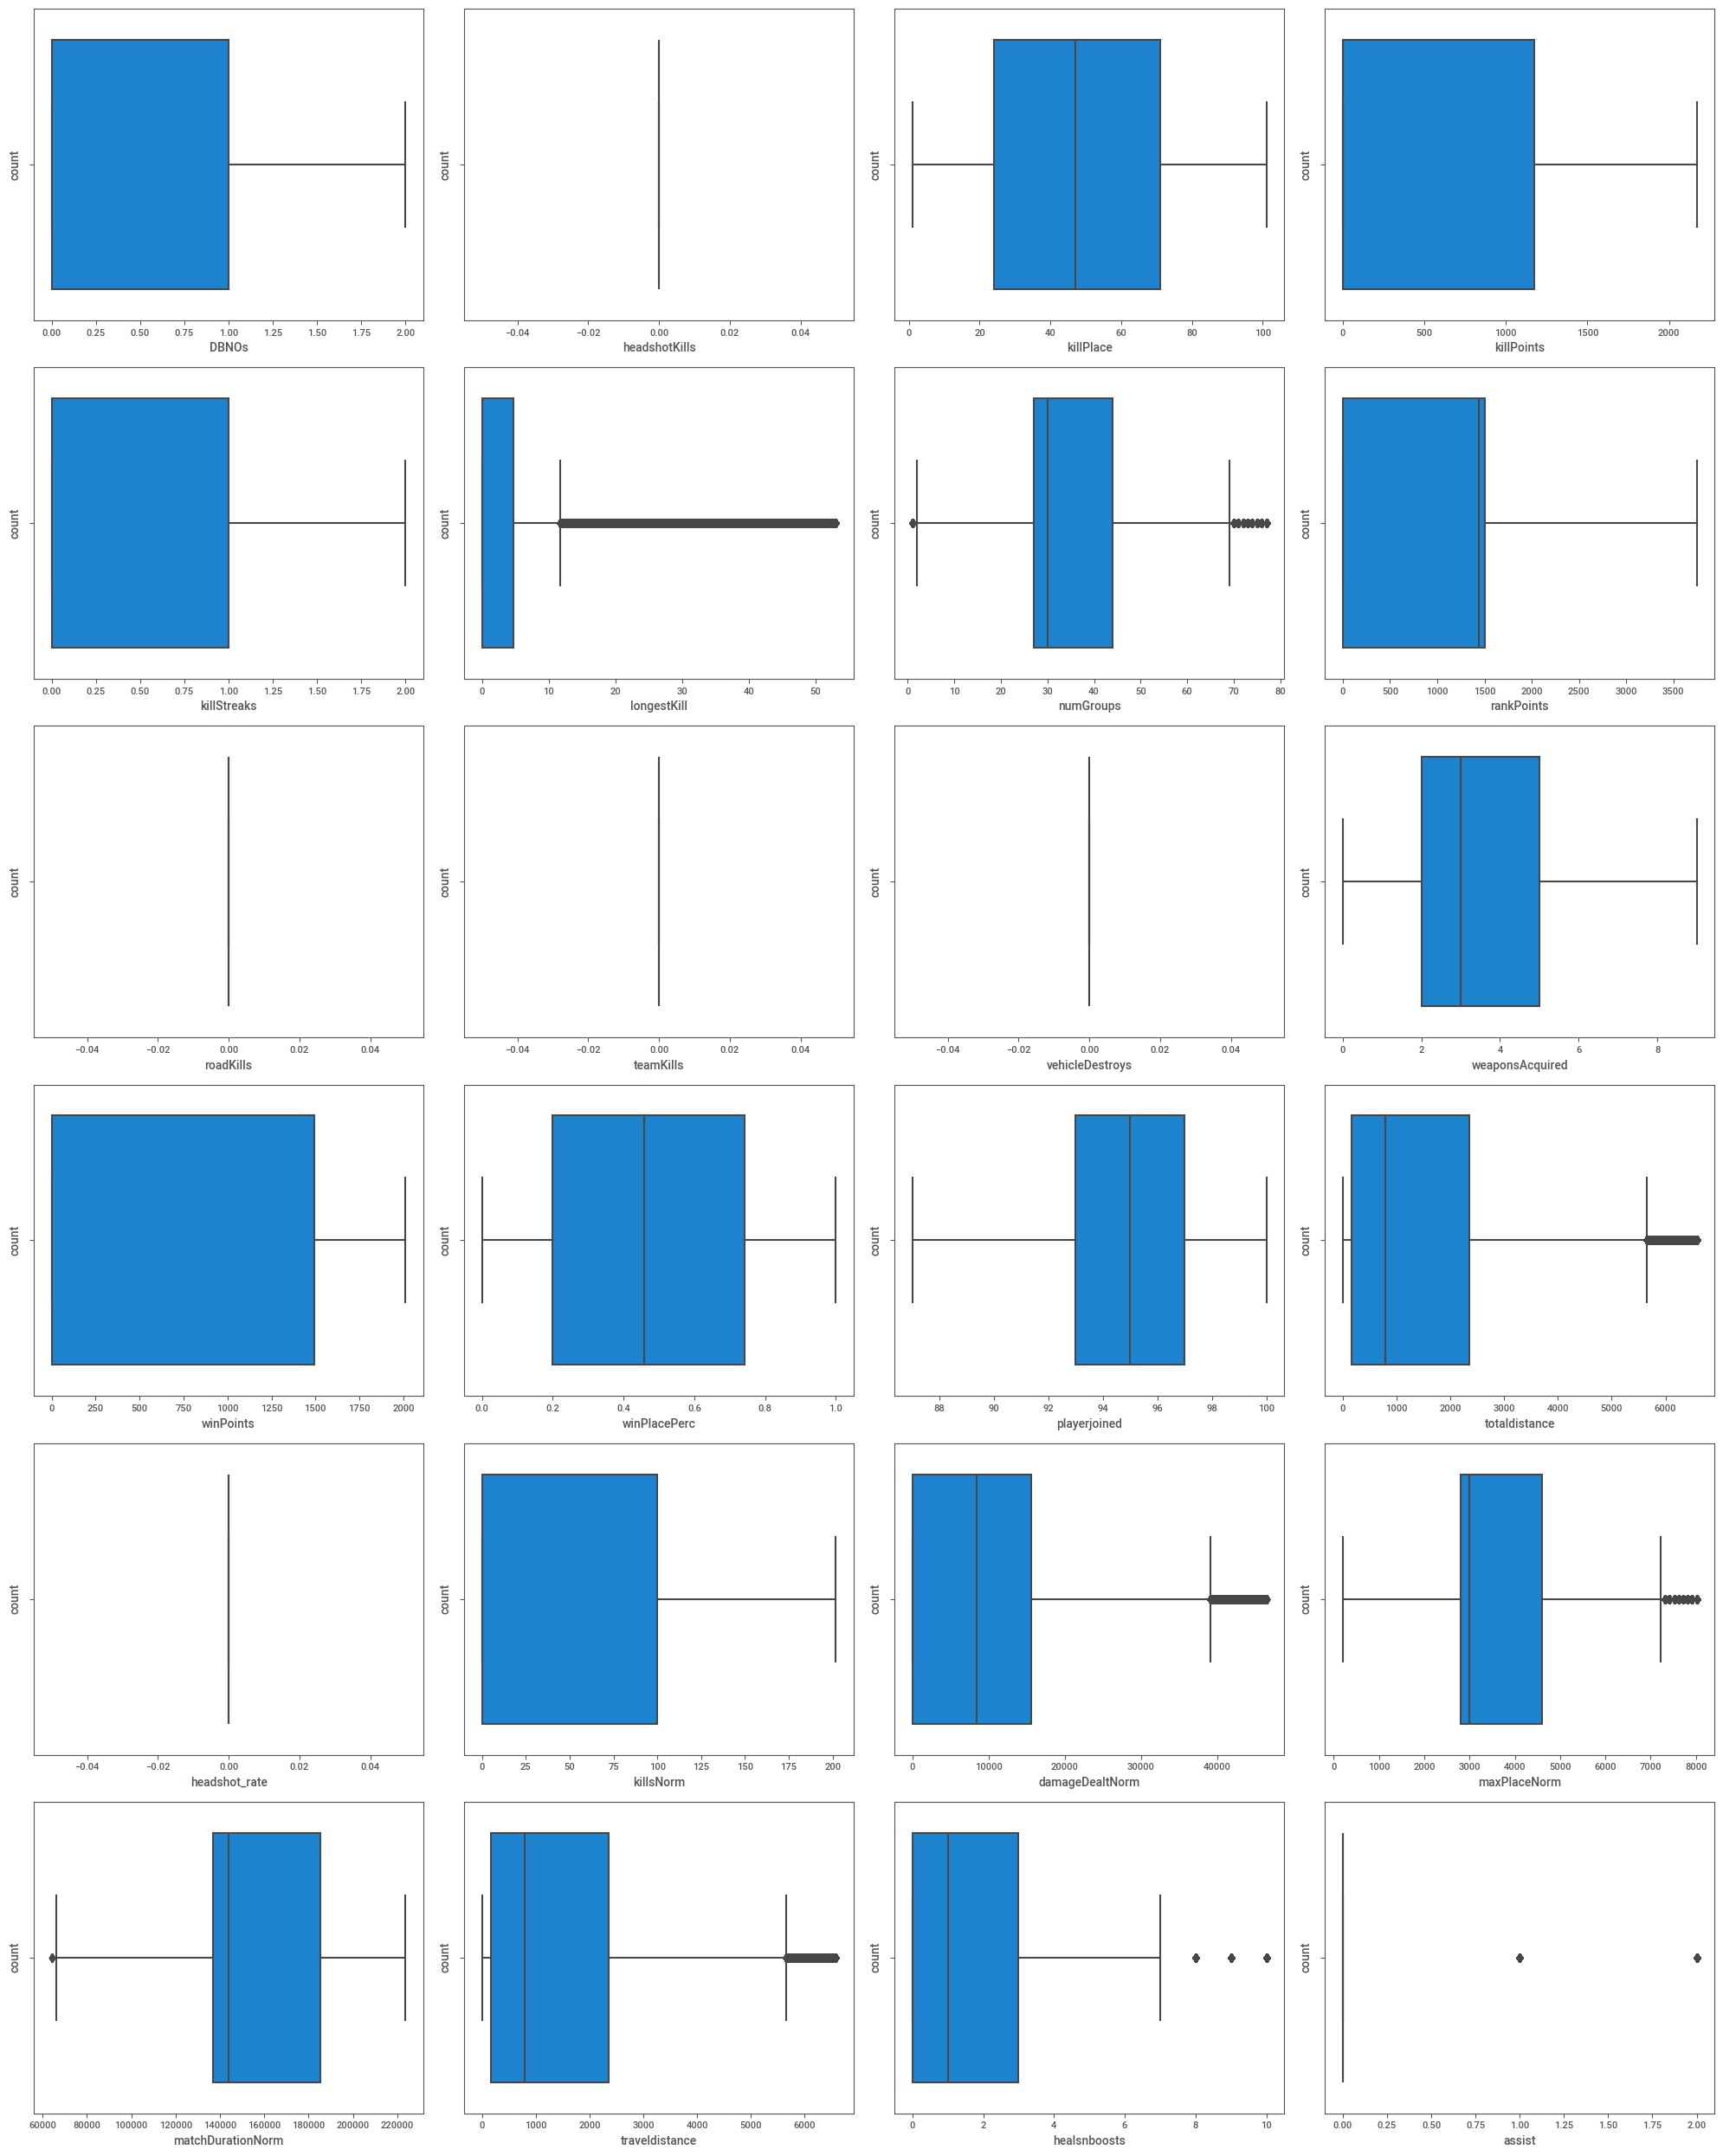

In [60]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data.columns:
    if plotnumber <= 25:
        ax = plt.subplot(6, 4, plotnumber)
        # Check if the column is numeric before plotting
        if data[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
            sns.boxplot(x=data[column])
            plt.xlabel(column)
            plt.ylabel('count')
        else:
            print(f"Skipping column '{column}' as it is non-numeric.")
            plotnumber -= 1  # Decrement plot number to ensure correct subplot position
    plotnumber += 1

plt.tight_layout()
plt.show()

In [61]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [62]:
features = x.columns

# Data Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =scaler.fit_transform(x)

In [64]:
data.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playerjoined', 'totaldistance', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [65]:
x

array([[-0.61743341,  0.        ,  0.45064371, ..., -0.73343266,
        -0.69974531, -0.5042827 ],
       [-0.61743341,  0.        ,  0.34136992, ...,  0.0214483 ,
        -0.69974531, -0.5042827 ],
       [-0.61743341,  0.        , -0.02287603, ..., -0.78563462,
        -0.69974531,  1.26637131],
       ...,
       [-0.61743341,  0.        ,  0.66919127, ..., -0.38997896,
        -0.69974531, -0.5042827 ],
       [ 0.93015975,  0.        , -1.33416144, ...,  0.84092823,
         1.63120079,  3.03702531],
       [-0.61743341,  0.        , -1.07918927, ...,  0.75602143,
         0.46572774, -0.5042827 ]])

In [66]:
x=pd.DataFrame(x,columns=['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playerjoined', 'totaldistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm', 'maxPlaceNorm',
       'matchDurationNorm', 'traveldistance', 'healsnboosts', 'assist'])

In [67]:
x

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,-0.617433,0.0,0.450644,1.172866,-0.777088,-0.485606,0.782810,-0.798966,-1.212487,0.0,...,0.303848,-0.733433,0.0,-0.623582,-0.943432,-0.673122,-1.065740,-0.733433,-0.699745,-0.504283
1,-0.617433,0.0,0.341370,-0.804757,-0.777088,-0.485606,0.782810,-0.910714,0.803828,0.0,...,-1.444247,0.021448,0.0,-0.623582,-0.099426,-0.888680,0.767017,0.021448,-0.699745,-0.504283
2,-0.617433,0.0,-0.022876,-0.804757,-0.777088,-0.485606,-1.657425,1.547741,0.813333,0.0,...,1.003086,-0.785635,0.0,-0.623582,-0.316426,1.712434,-1.020157,-0.785635,-0.699745,1.266371
3,-0.617433,0.0,0.997013,-0.804757,-0.777088,-0.485606,0.782810,-0.351974,0.700636,0.0,...,-1.444247,-0.759911,0.0,-0.623582,-0.639860,-0.345990,-0.558048,-0.759911,-0.699745,-0.504283
4,-0.617433,0.0,-0.095725,-0.804757,0.757453,-0.485606,0.407390,-0.351974,0.907020,0.0,...,0.653467,-0.856107,0.0,0.856440,-0.021272,-0.455504,-0.607995,-0.856107,-0.699745,-0.504283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443074,-0.617433,0.0,0.960588,0.835029,-0.777088,-0.485606,0.782810,-0.575470,-1.212487,0.0,...,-0.395390,0.566082,0.0,-0.623582,-0.943432,-0.564010,1.137875,0.566082,-0.699745,-0.504283
4443075,-0.617433,0.0,0.778465,-0.804757,-0.777088,-0.485606,0.219679,-0.351974,0.826911,0.0,...,-0.745009,-0.836013,0.0,-0.623582,-0.536136,-0.455504,-0.563048,-0.836013,-0.311254,-0.504283
4443076,-0.617433,0.0,0.669191,-0.804757,-0.777088,-0.485606,0.782810,-0.575470,0.825553,0.0,...,1.003086,-0.389979,0.0,-0.623582,-0.398859,-0.673730,-1.008508,-0.389979,-0.699745,-0.504283
4443077,0.930160,0.0,-1.334161,-0.804757,0.757453,-0.485606,0.782810,-0.910714,0.714214,0.0,...,-0.395390,0.840928,0.0,2.337348,0.720644,-0.889526,-0.804454,0.840928,1.631201,3.037025


In [68]:
y

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4443079, dtype: float64

#  Data Spliting 

In [69]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state = 20)

In [70]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3110155, 24) (3110155,)
(1332924, 24) (1332924,)


In [71]:
X_train

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,playerjoined,totaldistance,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
3855381,-0.617433,0.0,0.304945,1.470864,-0.777088,-0.485606,-1.469715,1.435993,-1.211129,0.0,...,-0.045771,-0.370535,0.0,-0.623582,-0.717550,1.605566,-0.478709,-0.370535,-0.699745,-0.504283
578903,-0.617433,0.0,0.887739,0.938611,-0.777088,-0.485606,0.595100,-1.134210,-1.212487,0.0,...,-0.395390,-0.574940,0.0,-0.623582,-0.048576,-0.889526,1.025219,-0.574940,-0.311254,-0.504283
962071,0.930160,0.0,-1.370586,1.684403,0.757453,-0.485606,0.782810,-0.687218,-1.212487,0.0,...,0.303848,-0.521166,0.0,-0.623582,1.780902,-0.673122,-0.859895,-0.521166,0.077237,-0.504283
1413876,-0.617433,0.0,0.377795,1.037412,-0.777088,-0.485606,0.782810,-0.687218,-1.212487,0.0,...,1.003086,0.610736,0.0,-0.623582,-0.943432,-0.348344,1.084486,0.610736,-0.311254,-0.504283
247251,-0.617433,0.0,1.251985,-0.804757,-0.777088,-0.485606,0.407390,-0.351974,0.848635,0.0,...,-1.094628,-0.840157,0.0,-0.623582,-0.943432,-0.455504,1.387997,-0.840157,-0.699745,-0.504283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149643,-0.617433,0.0,0.159247,0.921082,-0.777088,-0.485606,0.407390,-0.351974,-1.212487,0.0,...,0.303848,-0.295376,0.0,-0.623582,0.015710,-0.455504,-0.580255,-0.295376,-0.699745,-0.504283
1697172,-0.617433,0.0,-0.059301,-0.804757,-0.777088,-0.485606,-1.469715,1.324245,0.836415,0.0,...,0.303848,1.174316,0.0,-0.623582,-0.943432,1.496551,-0.856011,1.174316,0.077237,-0.504283
3890076,0.930160,0.0,-0.314273,-0.804757,0.757453,0.084670,-1.469715,1.659489,0.862213,0.0,...,-0.045771,-0.871472,0.0,0.856735,0.347850,1.497072,-0.700112,-0.871472,-0.699745,-0.504283
2976218,-0.617433,0.0,1.543382,1.297165,-0.777088,-0.485606,0.782810,-0.798966,-1.212487,0.0,...,-0.745009,-0.887397,0.0,-0.623582,-0.943432,-0.889244,-0.726220,-0.887397,-0.699745,-0.504283


In [72]:
y_train

3858765    0.5208
579424     0.0400
962924     0.5185
1415126    0.5333
247465     0.0769
            ...  
3152417    0.8211
1698665    0.8936
3893483    0.1064
2978847    0.0000
1032445    0.5426
Name: winPlacePerc, Length: 3110155, dtype: float64

## Task 2:-Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. 

# Model Building

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Model Evaluation

In [74]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [75]:
models = {
    'LinearRegression': LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 0.1451
- Mean Absolute Error: 0.1063
- R2 Score: 0.7770
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1449
- Mean Absolute Error: 0.1062
- R2 Score: 0.7775


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0026
- Mean Absolute Error: 0.0000
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1187
- Mean Absolute Error: 0.0821
- R2 Score: 0.8508


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0835
- Mean Absolute Error: 0.0596
- R2 Score: 0.9263
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0840
- Mean Absolute Error: 0.0598
- R2 Score: 0.9253


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1417
- Mean Absolute Error: 0.1080
- R2 Score: 0.7875
------------

### Best 2 Predictive models to predict the win probability of the Pubg match are:-  XGBRegressor(accuracy-92%) and GradientBoostingRegressor (accuracy-82%)


## Important Features

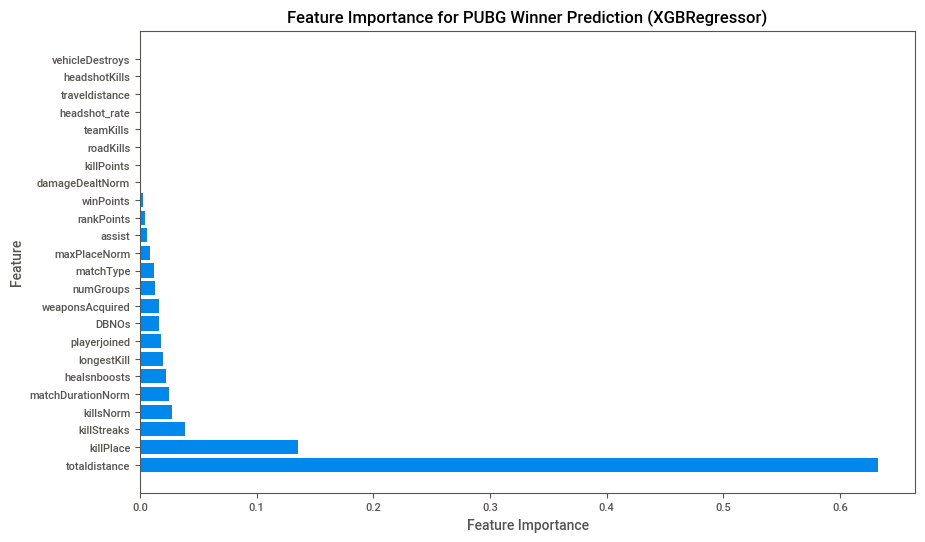

In [76]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = x.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for PUBG Winner Prediction (XGBRegressor)')
plt.show()

###  Important factors affecting the win probability of the pubg game, as shown in the plot are:-                     totaldistance, killplace, killStreaks and healboosts

# Model Comparison Report

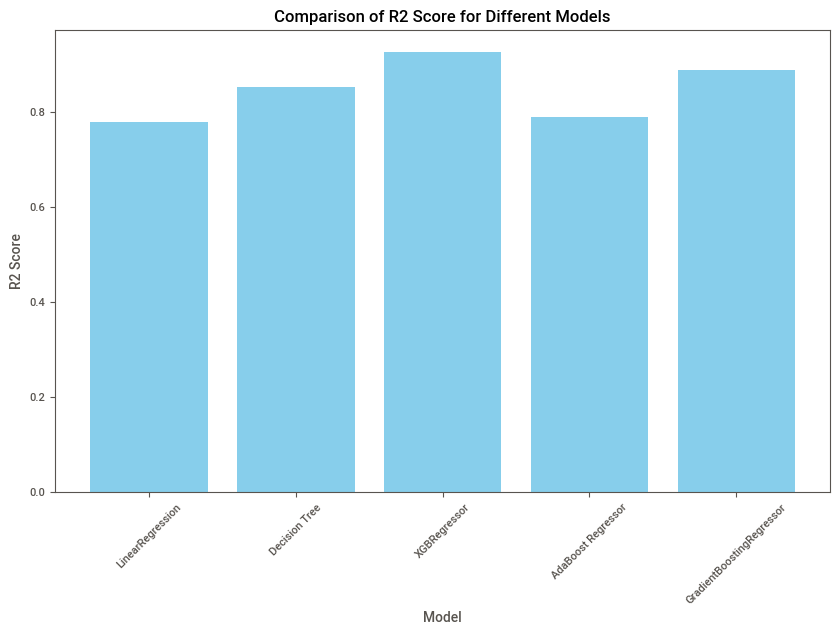

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(model_list, r2_list, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Different Models')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({'Model': model_list, 'R2 Score': r2_list})

# Print the DataFrame
print(evaluation_df)

# If you want to display the DataFrame as a table in a Jupyter Notebook or Google Colab, you can simply do:
display(evaluation_df)

                       Model  R2 Score
0           LinearRegression  0.777467
1              Decision Tree  0.850786
2               XGBRegressor  0.925273
3         AdaBoost Regressor  0.787515
4  GradientBoostingRegressor  0.886894


,Model,R2 Score
0,LinearRegression,0.777467
1,Decision Tree,0.850786
2,XGBRegressor,0.925273
3,AdaBoost Regressor,0.787515
4,GradientBoostingRegressor,0.886894


# Conclusion

* Based on the evaluation of various machine learning models on the provided dataset, it can be concluded that the best performing model for the task of PUBG winner prediction is XGBRegressor. This conclusion is based on several evaluation factors includes  Root Mean Squared Error: 0.0832, Mean Absolute Error: 0.0595, R2 Score: 0.9265

* Additionally, analysis of feature importance reveals that certain features have a significant impact on the model's predictive performance. Some of the most important features contributing to the model's accuracy include totaldistance, killplace, killStreaks and healboosts.








# Report on Challenges faced


## Introduction:
**In this report, we present our findings on building a machine learning model to predict the winner of PUBG (PlayerUnknown's Battlegrounds) matches. The objective of this project was to develop a model that accurately predicts the winner based on various in-game features.

## Dataset Description:
**The dataset used for this project consists of various in-game features such as player kills, distance traveled, number of weapons acquired, etc., collected from PUBG matches. The dataset contains both numerical and categorical features, providing a diverse set of information for training the prediction model.

## Challenges Faced:

**Missing Values: One of the major challenges encountered was handling missing values within the dataset. Several features had missing values which needed to be addressed before training the model. We employed techniques such as mean imputation for numerical features and mode imputation for categorical features to handle missing values effectively.

**Feature Engineering: The raw dataset contained numerous features, some of which were redundant or irrelevant for prediction purposes. Feature engineering was crucial to select relevant features and create new informative features. We performed feature selection techniques such as correlation analysis and recursive feature elimination to identify the most predictive features for the model.

**Imbalanced Data: The dataset exhibited class imbalance, with a disproportionate number of matches ending in different outcomes (win/loss). This imbalance could potentially bias the model's predictions. To address this issue, we applied techniques such as oversampling the minority class and using appropriate evaluation metrics like F1-score to account for class imbalance.

**Model Selection: Choosing the most suitable machine learning algorithm for the prediction task was another challenge. We experimented with various algorithms including linear regression, decision trees, ensemble methods (e.g., Random Forest, Gradient Boosting), and advanced algorithms like XGBoost. Each algorithm has its advantages and limitations, and the selection was based on factors such as accuracy, interpretability, and computational efficiency.

## Techniques Used:

**Data Preprocessing: We performed comprehensive data preprocessing steps including handling missing values, feature scaling, encoding categorical variables, and feature selection to prepare the dataset for model training.

**Feature Engineering: Feature engineering played a crucial role in improving the model's performance. We derived new features such as kill-death ratio, player rating, and team size to capture additional information relevant to the prediction task.

**Ensemble Learning: Ensemble learning techniques such as Random Forest and Gradient Boosting were employed due to their ability to handle complex relationships in the data and produce robust predictions. These models combine multiple weak learners to improve overall performance and generalize well to unseen data.

## Conclusion:
**Based on our experimentation and evaluation, we found that XGBRegressor emerged as the most effective model for predicting PUBG match winners. This conclusion was reached after overcoming various challenges related to data preprocessing, feature engineering, and model selection. Moving forward, further refinements and optimizations can be made to enhance the model's performance and make it suitable for practical deployment in real-world scenarios.